<a href="https://colab.research.google.com/github/coder7475/HandWrittenImageClassification_MNIST/blob/main/handwritten_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import needed Libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

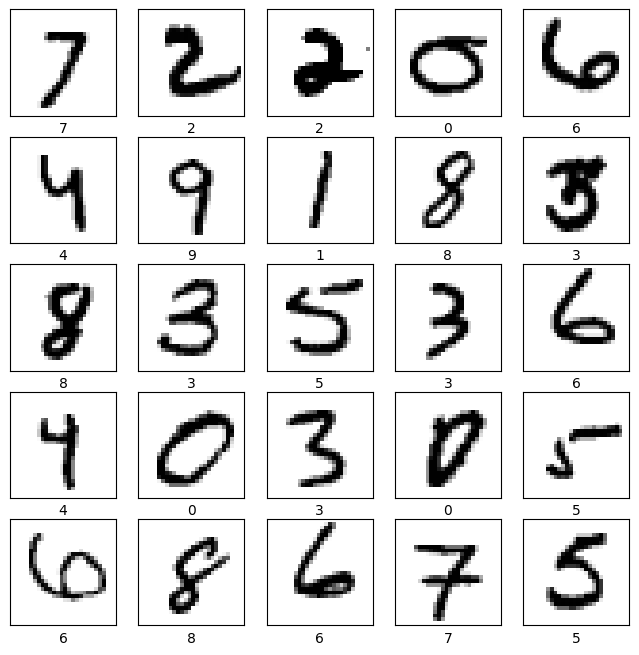

In [ ]:
# Show samples of dataset
import random

# Select 25 random images from the training set
num_samples = 25
sample_indexes = random.sample(range(len(x_train)), num_samples)
samples = x_train[sample_indexes]
labels = y_train[sample_indexes]

# Plot the images in a 5x5 grid
plt.figure(figsize=(8,8))
for i in range(num_samples):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(samples[i], cmap=plt.cm.binary)
    plt.xlabel(labels[i])
plt.show()


In [ ]:
# Find the size and dimension of dataset images
print(x_train.shape)

(60000, 28, 28)


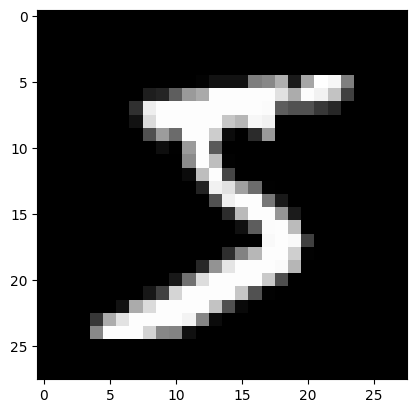

In [ ]:
# Explore first image
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap='gray')
plt.show()

In [ ]:
# Let's see what are the pixel values of image
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
# Preprocessing of data - Image value normalization
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
# Add the batch dimension
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [ ]:
x_train.shape

(60000, 28, 28, 1, 1)

In [ ]:
# Define model architecture- 2 CNN + 2 FC layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


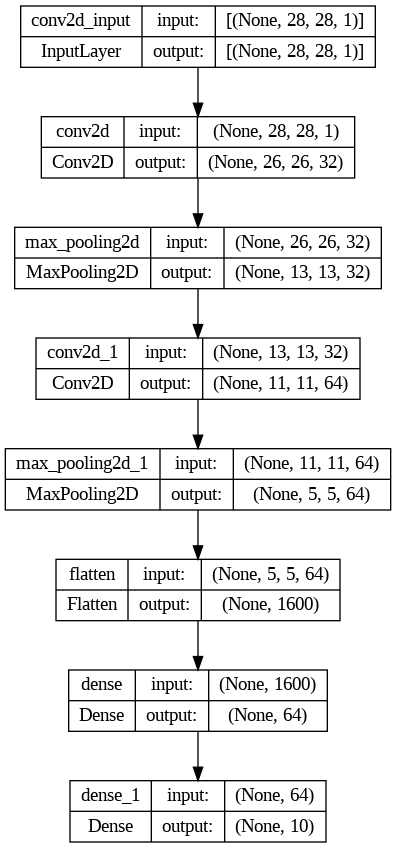

In [ ]:
from keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Compile the model using appropriate optimizer, loss function and metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0578 - accuracy: 0.9827 - val_loss: 0.0568 - val_accuracy: 0.9811
Epoch 2/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0532 - accuracy: 0.9842 - val_loss: 0.0577 - val_accuracy: 0.9804
Epoch 3/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0498 - accuracy: 0.9843 - val_loss: 0.0519 - val_accuracy: 0.9829
Epoch 4/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0471 - accuracy: 0.9853 - val_loss: 0.0522 - val_accuracy: 0.9841
Epoch 5/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0439 - accuracy: 0.9859 - val_loss: 0.0559 - val_accuracy: 0.9821
Epoch 6/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0422 - accuracy: 0.9868 - val_loss: 0.0520 - val_accuracy: 0.9836
Epoch 7/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0390 - accuracy: 0.9879 - val_loss: 0.0507 -

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


313/313 [==============================] - 2s 7ms/step - loss: 0.0479 - accuracy: 0.9859
Test accuracy: 0.9858999848365784


In [ ]:
# Save model
model.save('second_model.h5')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

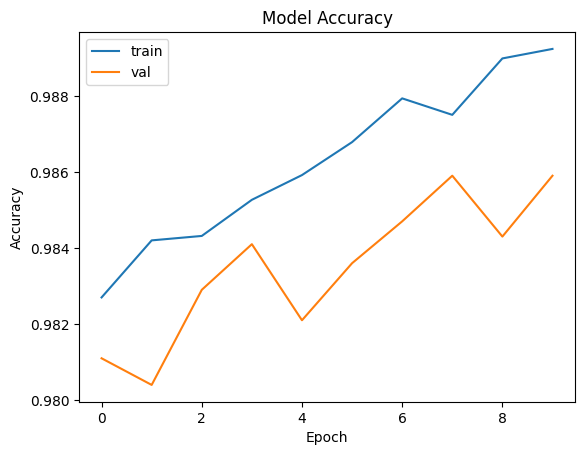

In [ ]:
import matplotlib.pyplot as plt

# Train your model here...

# Plot the training and validation accuracy over time
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/HandWrittenImageClassification_MNIST

/content/drive/MyDrive/MNIST


# New Section

In [ ]:
!git init

Reinitialized existing Git repository in /content/drive/MyDrive/MNIST/.git/


In [26]:
!git add .

In [27]:
!git commit -m "Initial commit"

On branch master

Initial commit

nothing to commit (create/copy files and use "git add" to track)


In [28]:
!git branch -M main

error: refname refs/heads/master not found
fatal: Branch rename failed


In [ ]:
!git remote add origin https://github.com/coder7475/HandWrittenImageClassification_MNIST.git

fatal: remote origin already exists.


In [ ]:
!git push -u origin main

error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/coder7475/HandWrittenImageClassification_MNIST.git'


In [ ]:
!git branch -M main

error: refname refs/heads/master not found
fatal: Branch rename failed
